In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

# Define the ticker for the stock you want to get data for
ticker = "^NSEI"

# Download 3 months of historical data using the daily time frame
data = yf.download(ticker, start='2013-01-01', end='2023-01-01')[['Adj Close']]
df_=pd.DataFrame(data)

close=df_['Adj Close'].to_numpy()
# print(close)

# Print the DataFrame to see the data
# print(df_)

data2 = yf.download(ticker, start='2023-01-01', end='2023-07-01')[['Adj Close']]
df2_=pd.DataFrame(data2)

# Print the DataFrame to see the data
# print(df2_)
close2=df2_['Adj Close'].to_numpy()
# close2

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
daily_return=[]
for i in range(1,len(close)):
    daily_return.append(np.log(close[i]/close[i-1]))
#     daily_return.append(close[i]/close[i-1]-1)
    
# print(daily_return)
mean_value = np.mean(daily_return)
std_value = np.std(daily_return)

mu = mean_value*252
sigma = std_value*np.sqrt(252)
delta_t=1/252
instances=10000

arr = [[0 for i in range(len(close2))] for j in range(instances)]
for row in arr:
    row[0] = close2[0]
# print(arr)

In [3]:
def pred(S0):
    return S0*np.exp((mu-sigma*sigma/2)*delta_t+sigma*np.sqrt(delta_t)*np.random.normal(0, 1))

In [4]:
def ori_pred(S0):
    return S0*(1+mu*delta_t+sigma*np.random.normal(0, 1)*np.sqrt(delta_t))

In [5]:
for i in range(instances):
    for j in range(1, len(close2)):
        arr[i][j]=pred(arr[i][j-1])

In [6]:
pred_close2=[]
for j in range(0, len(close2)):
    temp=0
    for i in range(instances):
        temp+=arr[i][j]
    pred_close2.append(temp/instances)

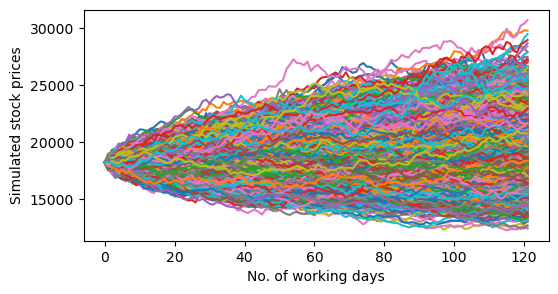

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2*3, 3))

# Plotting both arrays on the same graph
for row in arr:
    plt.plot(row)
    
# plt.plot(close2, label='Actual data', color="black")
# plt.plot(pred_close2, label='Predicted data', color='white')

# Adding labels and a legend
plt.xlabel('No. of working days')
plt.ylabel('Simulated stock prices')
# plt.legend()

# Displaying the plot
plt.show()

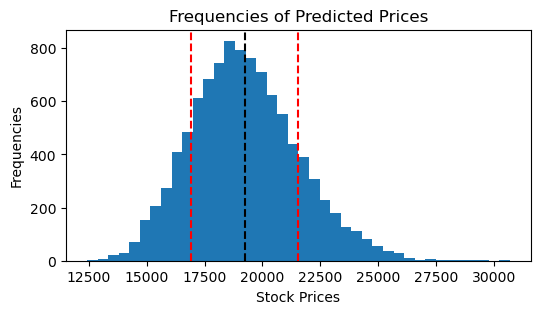

In [8]:
my_array = np.array(arr)
my_array=my_array[:,-1]

m=np.mean(my_array)
s=np.std(my_array)

# Plotting the histogram
plt.figure(figsize=(2*3, 3))
plt.hist(my_array, bins=40, alpha=1, rwidth=1)
plt.xlabel('Stock Prices')
plt.ylabel('Frequencies')
plt.title('Frequencies of Predicted Prices')

# Displaying the plot
plt.axvline(m, color='black', linestyle='dashed')
plt.axvline(m+s, color='red', linestyle='dashed')
plt.axvline(m-s, color='red', linestyle='dashed')

plt.show()